In [143]:
import pandas as pd
import numpy as np
from datetime import timedelta
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [163]:
# Read the data set
dfs = pd.read_excel('online-retail.xlsx', sheet_name=None)

In [240]:
df = dfs['Online Retail']

In [241]:
df.shape

(541909, 8)

In [242]:
df.head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01 08:26:00,7.65,17850.0,United Kingdom
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,2010-12-01 08:26:00,4.25,17850.0,United Kingdom
7,536366,22633,HAND WARMER UNION JACK,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom
8,536366,22632,HAND WARMER RED POLKA DOT,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,2010-12-01 08:34:00,1.69,13047.0,United Kingdom


In [243]:
df = df.drop_duplicates()

In [244]:
df.shape

(536641, 8)

In [245]:
df[df['Quantity'] < 0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527.0,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
...,...,...,...,...,...,...,...,...
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,2011-12-09 09:57:00,0.83,14397.0,United Kingdom
541541,C581499,M,Manual,-1,2011-12-09 10:28:00,224.69,15498.0,United Kingdom
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,2011-12-09 11:57:00,10.95,15311.0,United Kingdom
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,2011-12-09 11:58:00,1.25,17315.0,United Kingdom


In [246]:
df[df['UnitPrice'] <= 0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
622,536414,22139,NaN,56,2010-12-01 11:52:00,0.0,NaN,United Kingdom
1970,536545,21134,NaN,1,2010-12-01 14:32:00,0.0,NaN,United Kingdom
1971,536546,22145,NaN,1,2010-12-01 14:33:00,0.0,NaN,United Kingdom
1972,536547,37509,NaN,1,2010-12-01 14:33:00,0.0,NaN,United Kingdom
1987,536549,85226A,NaN,1,2010-12-01 14:34:00,0.0,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
536981,581234,72817,NaN,27,2011-12-08 10:33:00,0.0,NaN,United Kingdom
538504,581406,46000M,POLYESTER FILLER PAD 45x45cm,240,2011-12-08 13:58:00,0.0,NaN,United Kingdom
538505,581406,46000S,POLYESTER FILLER PAD 40x40cm,300,2011-12-08 13:58:00,0.0,NaN,United Kingdom
538554,581408,85175,NaN,20,2011-12-08 14:06:00,0.0,NaN,United Kingdom


In [247]:
df[df['CustomerID'].isnull()]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
622,536414,22139,NaN,56,2010-12-01 11:52:00,0.00,NaN,United Kingdom
1443,536544,21773,DECORATIVE ROSE BATHROOM BOTTLE,1,2010-12-01 14:32:00,2.51,NaN,United Kingdom
1444,536544,21774,DECORATIVE CATS BATHROOM BOTTLE,2,2010-12-01 14:32:00,2.51,NaN,United Kingdom
1445,536544,21786,POLKADOT RAIN HAT,4,2010-12-01 14:32:00,0.85,NaN,United Kingdom
1446,536544,21787,RAIN PONCHO RETROSPOT,2,2010-12-01 14:32:00,1.66,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
541536,581498,85099B,JUMBO BAG RED RETROSPOT,5,2011-12-09 10:26:00,4.13,NaN,United Kingdom
541537,581498,85099C,JUMBO BAG BAROQUE BLACK WHITE,4,2011-12-09 10:26:00,4.13,NaN,United Kingdom
541538,581498,85150,LADIES & GENTLEMEN METAL SIGN,1,2011-12-09 10:26:00,4.96,NaN,United Kingdom
541539,581498,85174,S/4 CACTI CANDLES,1,2011-12-09 10:26:00,10.79,NaN,United Kingdom


In [248]:
df.columns[df.isna().any()].tolist()

['Description', 'CustomerID']

In [249]:
df = df[(df['Quantity'] > 0) & (df['UnitPrice'] > 0) & (df['CustomerID'].notnull())]

In [250]:
df.shape

(392692, 8)

In [251]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392692 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    392692 non-null  object        
 1   StockCode    392692 non-null  object        
 2   Description  392692 non-null  object        
 3   Quantity     392692 non-null  int64         
 4   InvoiceDate  392692 non-null  datetime64[ns]
 5   UnitPrice    392692 non-null  float64       
 6   CustomerID   392692 non-null  float64       
 7   Country      392692 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 27.0+ MB


In [252]:
df['TotalPrice'] = df['Quantity'] * df['UnitPrice']

In [253]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


In [254]:
df['InvoiceDate'] = df['InvoiceDate'].dt.date

In [255]:
max(df['InvoiceDate'])

datetime.date(2011, 12, 9)

In [256]:
max(df['InvoiceDate']) + timedelta(days=1)

datetime.date(2011, 12, 10)

In [257]:
recent_date = max(df['InvoiceDate']) + timedelta(days=1)

In [258]:
recent_date

datetime.date(2011, 12, 10)

### Transforming data for RFM Analysis 
### R stands for recency, so we use InvoiceDate to get most recent purchaces
### F stands for frequency, so we use count of InvoiceNo to get number of purchases made by customer
### M stands for Monetary, so we use sum of TotalPrice to get expenditure of customer

In [259]:
rfm_data = df.groupby('CustomerID').agg({
   'InvoiceDate': lambda x: (recent_date - max(x)).days,
   'InvoiceNo': 'count',
   'TotalPrice': 'sum'
})

In [260]:
rfm_data

,InvoiceDate,InvoiceNo,TotalPrice
CustomerID,,,
12346.0,326,1,77183.60
12347.0,3,182,4310.00
12348.0,76,31,1797.24
12349.0,19,73,1757.55
12350.0,311,17,334.40
...,...,...,...
18280.0,278,10,180.60
18281.0,181,7,80.82
18282.0,8,12,178.05


In [261]:
rfm_data.columns = ['Recency', 'Frequency', 'Monetary']

In [262]:
rfm_data

,Recency,Frequency,Monetary
CustomerID,,,
12346.0,326,1,77183.60
12347.0,3,182,4310.00
12348.0,76,31,1797.24
12349.0,19,73,1757.55
12350.0,311,17,334.40
...,...,...,...
18280.0,278,10,180.60
18281.0,181,7,80.82
18282.0,8,12,178.05


In [263]:
rfm_data.corr()

,Recency,Frequency,Monetary
Recency,1.000000,-0.206501,-0.121975
Frequency,-0.206501,1.000000,0.425282
Monetary,-0.121975,0.425282,1.000000


<AxesSubplot:>

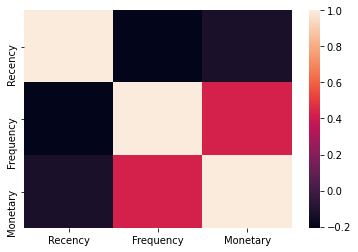

In [264]:
sns.heatmap(rfm_data.corr())

In [265]:
rfm_data.describe()

,Recency,Frequency,Monetary
count,4338.000000,4338.000000,4338.000000
mean,93.059474,90.523744,2048.688081
std,100.012264,225.506968,8985.230220
min,1.000000,1.000000,3.750000
25%,18.000000,17.000000,306.482500
50%,51.000000,41.000000,668.570000
75%,142.750000,98.000000,1660.597500
max,374.000000,7676.000000,280206.020000


In [266]:
#Normalize the data
scaler = StandardScaler()

In [267]:
rfm_data = pd.DataFrame(scaler.fit_transform(rfm_data), columns=rfm_data.columns, index=rfm_data.index)

In [268]:
rfm_data

,Recency,Frequency,Monetary
CustomerID,,,
12346.0,2.329388,-0.397035,8.363010
12347.0,-0.900588,0.405694,0.251699
12348.0,-0.170593,-0.263986,-0.027988
12349.0,-0.740589,-0.077717,-0.032406
12350.0,2.179389,-0.326075,-0.190812
...,...,...,...
18280.0,1.849392,-0.357120,-0.207931
18281.0,0.879399,-0.370425,-0.219037
18282.0,-0.850588,-0.348250,-0.208214


In [269]:
#Elbow method to select best k 
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=1).fit(rfm_data)
    inertia.append(kmeans.inertia_)

In [270]:
inertia

[13014.000000000004,
 8989.04820478467,
 5446.040054546088,
 4003.948549989731,
 2960.2604240744568,
 2373.0031609399653,
 1925.5803685157377,
 1676.9356946657833,
 1490.0678494944084,
 1341.3142011433988]

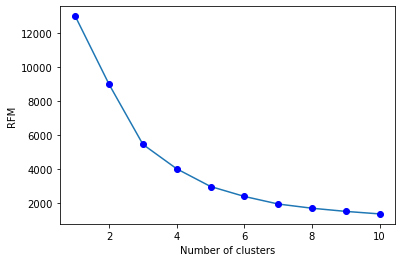

In [282]:
plt.plot(range(1, 11), inertia)
plt.plot(range(1, 11), inertia, 'bo')
plt.xlabel('Number of clusters')
plt.ylabel('RFM') 
plt.show()

In [272]:
#Apply K-Means clustering to cluster the customers
model = KMeans(n_clusters = 5, random_state=1).fit(rfm_data)
centers = model.cluster_centers_

In [273]:
centers

array([[-0.76332005,  1.70098836,  1.08000291],
       [-0.48173538, -0.08188082, -0.08013512],
       [ 1.56925152, -0.27992631, -0.17363005],
       [-0.85058848,  3.26107154, 21.0102139 ],
       [-0.90558808, 24.95432826,  7.63157557]])

In [274]:
rfm_data = pd.DataFrame(scaler.inverse_transform(rfm_data), columns=rfm_data.columns, index=rfm_data.index)

In [275]:
rfm_data

,Recency,Frequency,Monetary
CustomerID,,,
12346.0,326.0,1.0,77183.60
12347.0,3.0,182.0,4310.00
12348.0,76.0,31.0,1797.24
12349.0,19.0,73.0,1757.55
12350.0,311.0,17.0,334.40
...,...,...,...
18280.0,278.0,10.0,180.60
18281.0,181.0,7.0,80.82
18282.0,8.0,12.0,178.05


In [278]:
rfm_data['CustomerID'] = rfm_data.index
rfm_data['Cluster'] = model.labels_

In [279]:
rfm_data

,Recency,Frequency,Monetary,CustomerID,Cluster
CustomerID,,,,,
12346.0,326.0,1.0,77183.60,12346.0,0
12347.0,3.0,182.0,4310.00,12347.0,1
12348.0,76.0,31.0,1797.24,12348.0,1
12349.0,19.0,73.0,1757.55,12349.0,1
12350.0,311.0,17.0,334.40,12350.0,2
...,...,...,...,...,...
18280.0,278.0,10.0,180.60,18280.0,2
18281.0,181.0,7.0,80.82,18281.0,2
18282.0,8.0,12.0,178.05,18282.0,1


In [281]:
rfm_data.groupby('Cluster').agg({
    'Recency': ['min', 'mean', 'max'],
    'Frequency': ['min', 'mean', 'max'],
    'Monetary': ['min', 'mean', 'max'],
})

Recency                    Frequency                        Monetary  \
            min        mean    max       min         mean     max        min   
Cluster                                                                        
0           1.0   16.726908  326.0       1.0   474.064257  2677.0    1071.73   
1           1.0   44.885582  157.0       1.0    72.061177   342.0       6.20   
2         146.0  249.985782  374.0       1.0    27.405687   297.0       3.75   
3           1.0    8.000000   25.0       3.0   825.833333  2076.0  117210.08   
4           1.0    2.500000    5.0    4412.0  5717.250000  7676.0   33053.19   

                                   
                  mean        max  
Cluster                            
0         11751.644297   91062.38  
1          1328.738576   16209.50  
2           488.761897    9864.26  
3        190808.536667  280206.02  
4         70612.247500  143711.17

# Conclusions

#### Cluster 4 has most valuable customers where they spend more with recent purcharchase history, so they can be targeted for new product launches
#### Cluster 2 has the most probably lost customers, need to make survey and get feedback from them and improve the services
#### Cluster 3 has more Monetary value, and avg frequency. Can target them with ads to get them to buy more and more 